In [47]:
# 1st Project Titanic DataSet


In [48]:
#All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have
#let's think of some questions or insights we would like to obtain from the data.
#So here's a list of questions we'll try to answer using our new data analysis skills!

#First some basic questions:

# 1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
# 2.) What deck were the passengers on and how does that relate to their class?
# 3.) Where did the passengers come from?
# 4.) Who was alone and who was with family?

# Then we'll dig deeper, with a broader question:

#5.) What factors helped someone survive the sinking?

#So let's start with the first question: Who were the passengers on the titanic?

In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [50]:
titanic_df=pd.read_csv('train.csv')

In [51]:
titanic_df 
# Survived 1=alive 0=dead
#Pclass the class of passenger 1st class or 3r or 2nd
#SibSp did they have siblings onboard 1=they have, 2=do not have
#Parch If they do not have sibling onboared then they have Parent or child onboard
#Embarked S,C,Q stands for city  C = Cherbourg, Q = Queenstown, S = Southampton


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

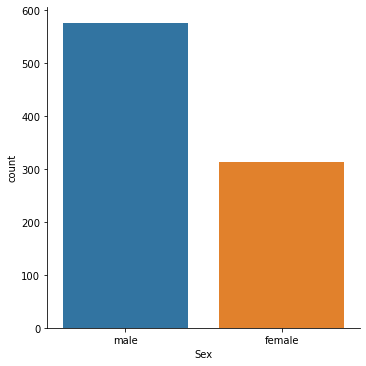

In [54]:
sns.catplot(x='Sex',data=titanic_df,kind='count')

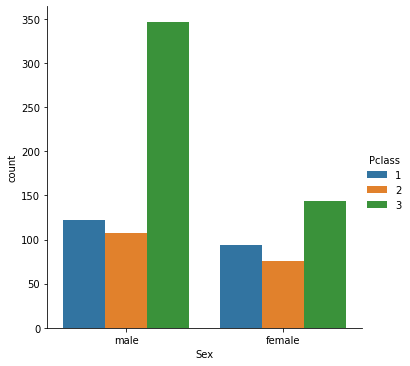

In [55]:
# Now let's seperate the genders by classes, remember we can use the 'hue' arguement here!
sns.catplot(x='Sex',data=titanic_df,hue='Pclass',kind='count')

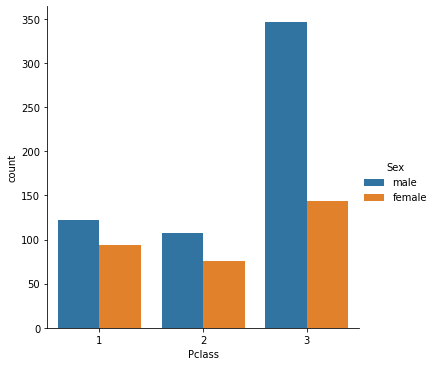

In [56]:
# Opposite of that
sns.catplot(x='Pclass',data=titanic_df,kind='count',hue='Sex')
# Wow, quite a few more males in the 3rd class than females, an interesting

In [57]:
#However, it might be useful to know the split between males,females,and children. How can we go about this?

In [58]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# First let's make a function to sort through the sex 
def male_female_child(passenger):
    #Take the age and sex 
    age,sex=passenger
    # Compare the age, otherwise leave the sex
    if age<16:
        return 'Child'
    else:
        return sex

In [59]:
# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [60]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


In [61]:
#Excellent! Now we have seperated the passengers between female,male,and child. 
#This will be important later on beacuse of the famous "Women and children first policy"!

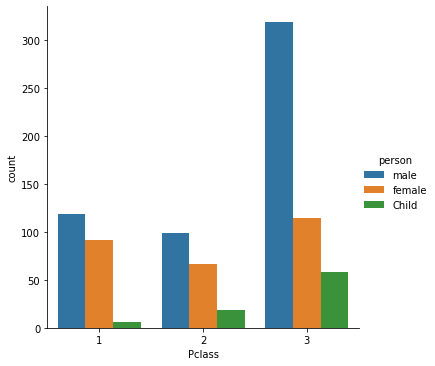

In [62]:
sns.catplot(x='Pclass',data=titanic_df,kind='count',hue='person')

#Interesting, quite a bit of children in 3rd class and not so many in 1st!
#How about we create a distribution of the ages to get a more precise picture of the who the passengers were.

<AxesSubplot:>

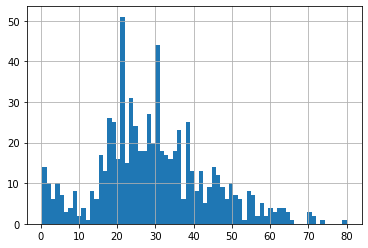

In [63]:
# Quick way to create a histogram using pandas
titanic_df["Age"].hist(bins=70)

In [64]:
# We could also get a quick overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
Child      83
Name: person, dtype: int64

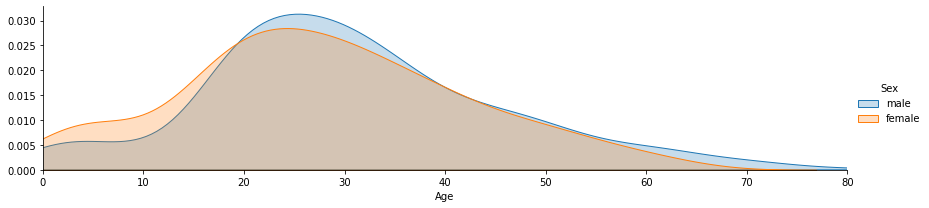

In [65]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue,
# and change the aspect ratio.
fig =sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade=True)

# Set the x max limit by the oldest passenger
oldest=titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend IT MEANS ADDING THE LABELS ON GRAPH LIKE HERE IT IS SEX,MALE AND FEMALE
fig.add_legend()

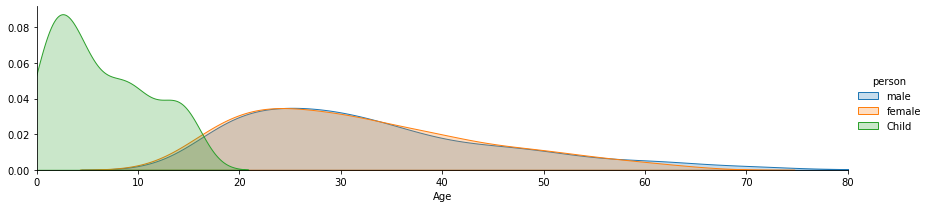

In [66]:
# We could have done the same thing for the 'person' column to include children:
fig =sns.FacetGrid(titanic_df,hue='person',aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade=True)

# Set the x max limit by the oldest passenger
oldest=titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend IT MEANS ADDING THE LABELS ON GRAPH LIKE HERE IT IS SEX,MALE AND FEMALE
fig.add_legend()

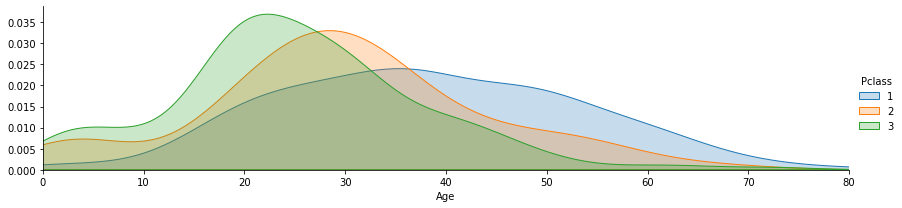

In [67]:
# Let's do the same for class by changing the hue argument:

fig =sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade=True)

# Set the x max limit by the oldest passenger
oldest=titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend IT MEANS ADDING THE LABELS ON GRAPH LIKE HERE IT IS SEX,MALE AND FEMALE
fig.add_legend()


In [68]:
titanic_df['person'].value_counts()

male      537
female    271
Child      83
Name: person, dtype: int64

In [69]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [70]:
# First we'll drop the NaN values and create a new object, deck
deck=titanic_df['Cabin'].dropna()

In [71]:
deck.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
E101           3
              ..
B79            1
C101           1
C32            1
B94            1
B78            1
Name: Cabin, Length: 147, dtype: int64

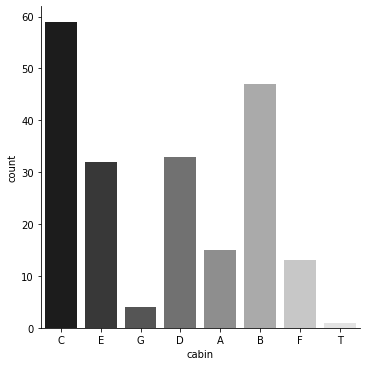

In [72]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels=[]

# Loop to grab first letter
for level in deck:
    levels.append(level[0])
    
# Reset DataFrame and use factor plot
cabin_df=DataFrame(levels)
cabin_df.columns=['cabin']

sns.catplot(x='cabin',data=cabin_df,kind='count',palette='gist_gray')

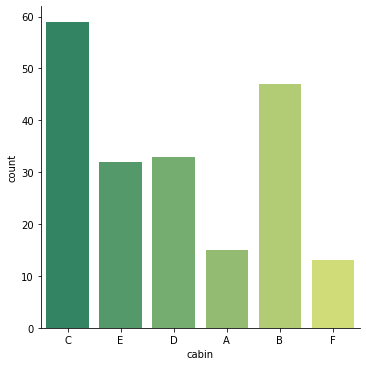

In [74]:
# Redefine cabin_df as everything but where the row was equal to 'T'
# Removing T and G since there value is low so we won't consider them
cabin_df=cabin_df[cabin_df.cabin!='T']

cabin_df=cabin_df[cabin_df.cabin!='G']
sns.catplot(x='cabin',data=cabin_df,kind='count',palette='summer')

In [75]:
cabin_df.value_counts()

cabin
C        59
B        47
D        33
E        32
A        15
F        13
dtype: int64

In [76]:
# Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question:

# 3.) Where did the passengers come from?

In [77]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


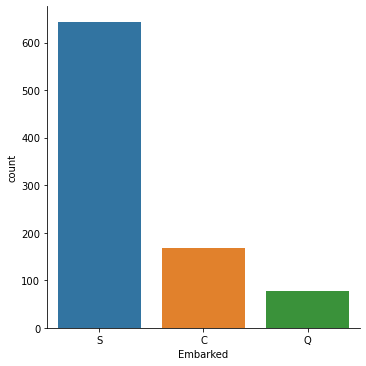

In [78]:
sns.catplot(x='Embarked',data=titanic_df,kind='count')
# So most people came from S - Southampton city

In [79]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

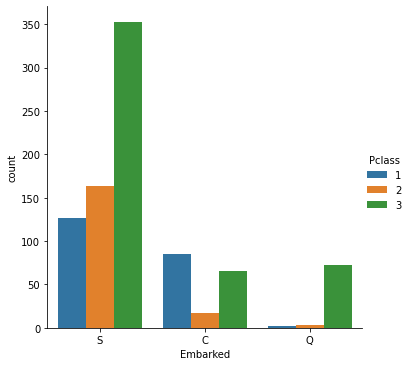

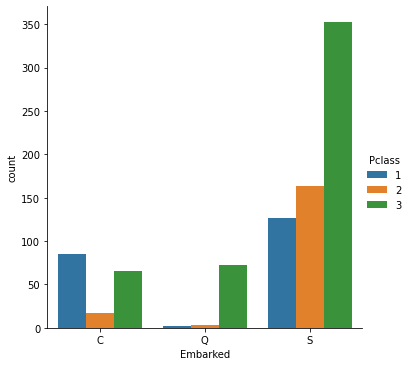

In [80]:
# Now to sort which class of people came from which city we can do this
sns.catplot(x='Embarked',data=titanic_df,kind='count',hue='Pclass')

# to change the order of cities in graph we can do
sns.catplot(x='Embarked',data=titanic_df,kind='count',order=['C','Q','S'],hue="Pclass")




In [81]:
# An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. 
# It would be intersting to look at the economics of that town in that time period for further investigation.

In [82]:
# Now let's take a look at the 4th question:

# 4.) Who was alone and who was with family?

# Let's start by adding a new column to define alone
# We'll add the parent/child column with the sibsp column
titanic_df['Alone']=titanic_df.Parch + titanic_df.SibSp

titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [83]:
# NOTE :- Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone.
# So let's change the column now so that if the value is greater than 0,
# we know the passenger was with his/her family, otherwise they were alone.


In [84]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = "With Family" 
titanic_df['Alone'].loc[titanic_df['Alone'] ==0] = "Alone"
# USE loc to go throw each value in that perticular column

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [85]:
titanic_df.head(10) # DO NOT RUN THE ABOVE CODE MULTIPLE TIMES

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,With Family


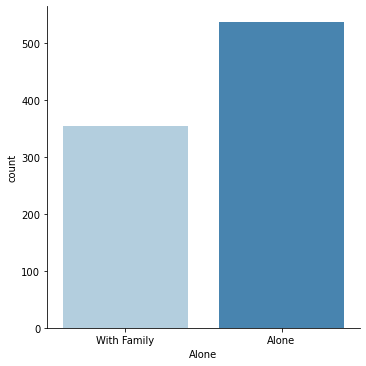

In [86]:
sns.catplot(x='Alone',data=titanic_df,palette='Blues',kind='count')

In [87]:
titanic_df['Alone'].value_counts()

Alone          537
With Family    354
Name: Alone, dtype: int64

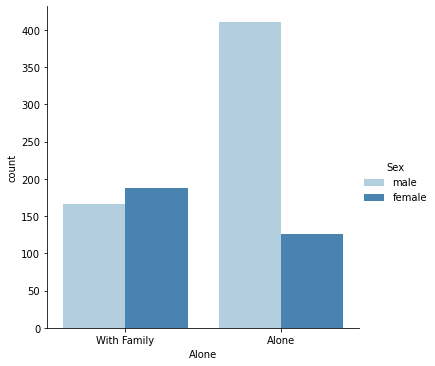

In [88]:
sns.catplot(x='Alone',data=titanic_df,palette='Blues',kind='count',hue='Sex')

In [89]:
# Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: 
# What factors helped someone survive the sinking?

In [90]:
# Let's start by creating a new column for legibility purposes through mapping (Lec 36)
titanic_df['Survivor']= titanic_df.Survived.map({0:'no',1:'yes'})

In [91]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,With Family,no
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,With Family,yes


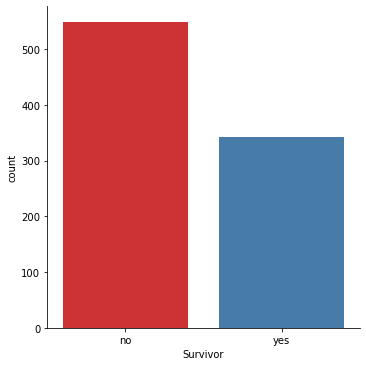

In [92]:
# Let's just get a quick overall view of survied vs died. 
sns.catplot(x='Survivor',data=titanic_df,palette='Set1',kind='count')
# seems like mostly people die

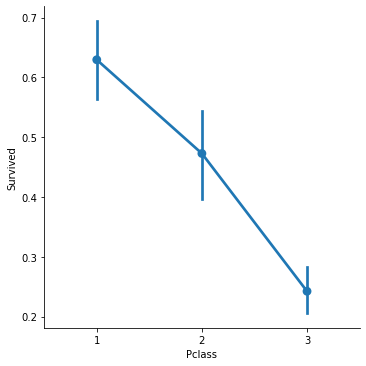

In [93]:
# Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that 
# the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

sns.catplot(x='Pclass',y='Survived',data=titanic_df,kind='point')

In [94]:
# Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being 
# caused by the large amount of men in the 3rd class in combination with the women and children first policy.
# Let's use 'hue' to get a clearer picture on this.

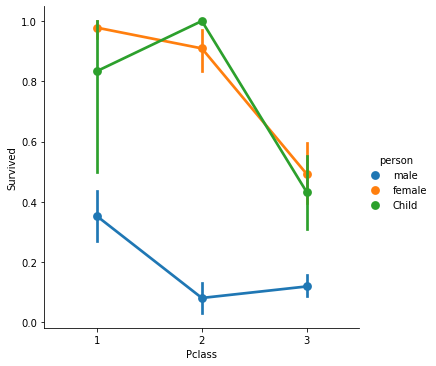

In [95]:
# Let's use a factor plot again, but now considering class and gender
sns.catplot(x='Pclass',y='Survived',data=titanic_df,kind='point',hue='person')

In [96]:
# From this data it looks like being a male or being in 3rd class were both not favourable for survival.
# Even regardless of class the result of 
# being a male in any class dramatically decreases your chances of survival.

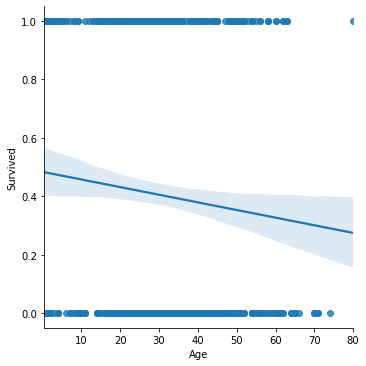

In [97]:
#But what about age? Did being younger or older have an effect on survival rate?

# Let's use a linear plot on age versus survival
sns.lmplot(x='Age',y='Survived',data=titanic_df)

In [98]:
# Looks like there is a general trend that the older the passenger was, the less likely they survived. 
# Let's go ahead and use hue to take a look at the effect of class and age.

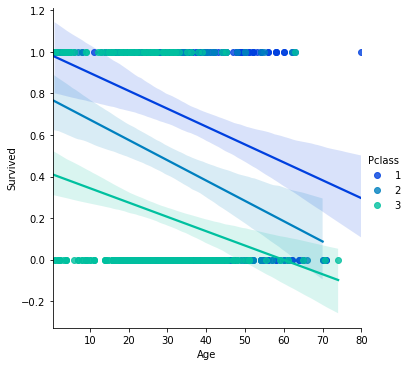

In [99]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass',palette='winter')

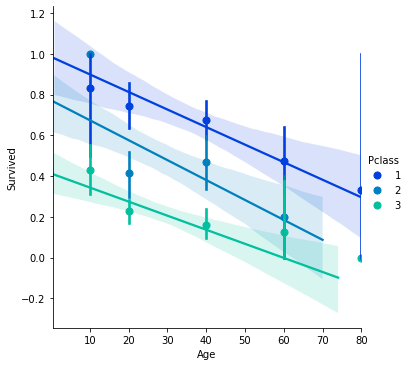

In [100]:
# We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass',palette='winter',x_bins=generations)

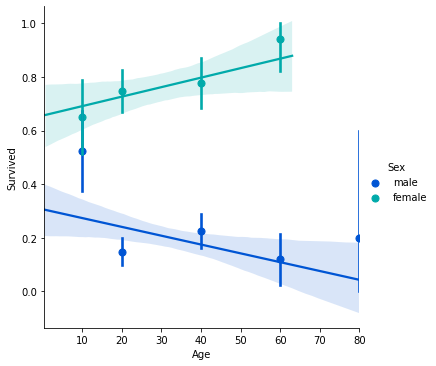

In [101]:
#Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Sex',palette='winter',x_bins=generations)


In [102]:
# Awesome! we've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival. Now you take control: Answer the following questions using pandas and seaborn:

# 1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
# 2.) Did having a family member increase the odds of surviving the crash?


In [113]:
#1 Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

In [103]:
deck=pd.concat([titanic_df,cabin_df],axis=1)

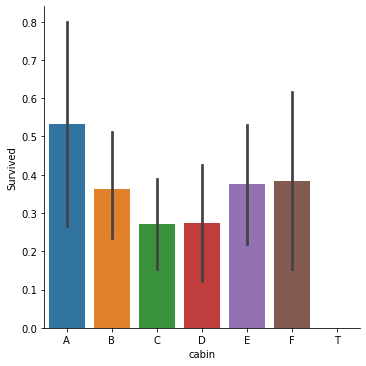

In [112]:
sns.catplot(x='cabin',y='Survived',data=deck,kind='bar',order=['A','B','C','D','E','F','T'])
            

 ans- The first class or the upper deck people have higher chance of servival then the lower deck

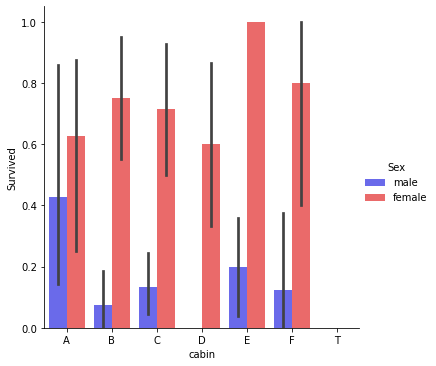

In [130]:
sns.catplot(x='cabin',y='Survived',data=deck,kind='bar',order=['A','B','C','D','E','F','T'],hue='Sex',palette='seismic')



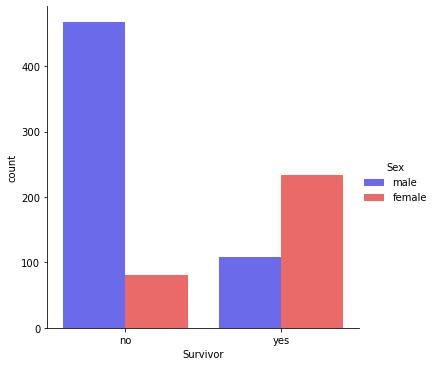

In [129]:
sns.catplot(x='Survivor',hue='Sex',kind='count',data=titanic_df,palette='seismic')
# THE FEMALE SURVIVE MORE THEN MALES

In [124]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


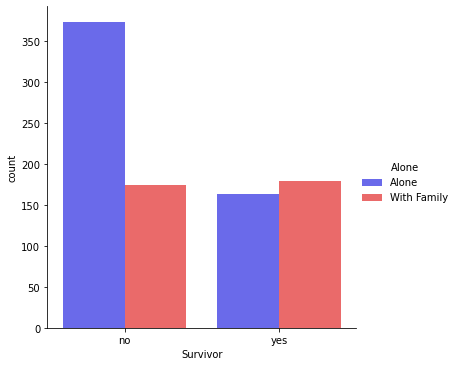

In [128]:
#2.) Did having a family member increase the odds of surviving the crash?
sns.catplot(x='Survivor',hue='Alone',kind='count',data=titanic_df,hue_order=['Alone','With Family'],palette='seismic')


In [131]:
# Ans-
Those who survived and having a family has a greater chance of surviving